**Instructions**: Complete the four tasks given taking the following points into
consideration:
* ● Vectorized implementations are possible for most operations, and using for or
while loops to access individual pixels is strongly discouraged due to its
inefficiency. You can use NumPy to perform the mathematical operations.
* ● You do not need to implement the convolution operations from scratch. However,
you must design the filters from scratch wherever applicable.


**Task 1: Image Exposure Check**


Write a function to check whether an image is overexposed, underexposed or correctly
exposed. Classify the given set of images into one of these exposure types.Use
VC_a.jpg,VC_b.jpg,VC_c.jpg,VC_d.jpg,VC_e.jpg,VC_f.jpg as inputs.


Analyzing image exposure...
Image Exposure Analysis Results:
VC_a.jpg        → underexposed
VC_c.jpg        → overexposed
VC_d.jpg        → correctly exposed
VC_e.jpg        → overexposed
VC_f.jpg        → overexposed

Summary:
--------------------
underexposed: 1 images
overexposed: 3 images
correctly exposed: 1 images


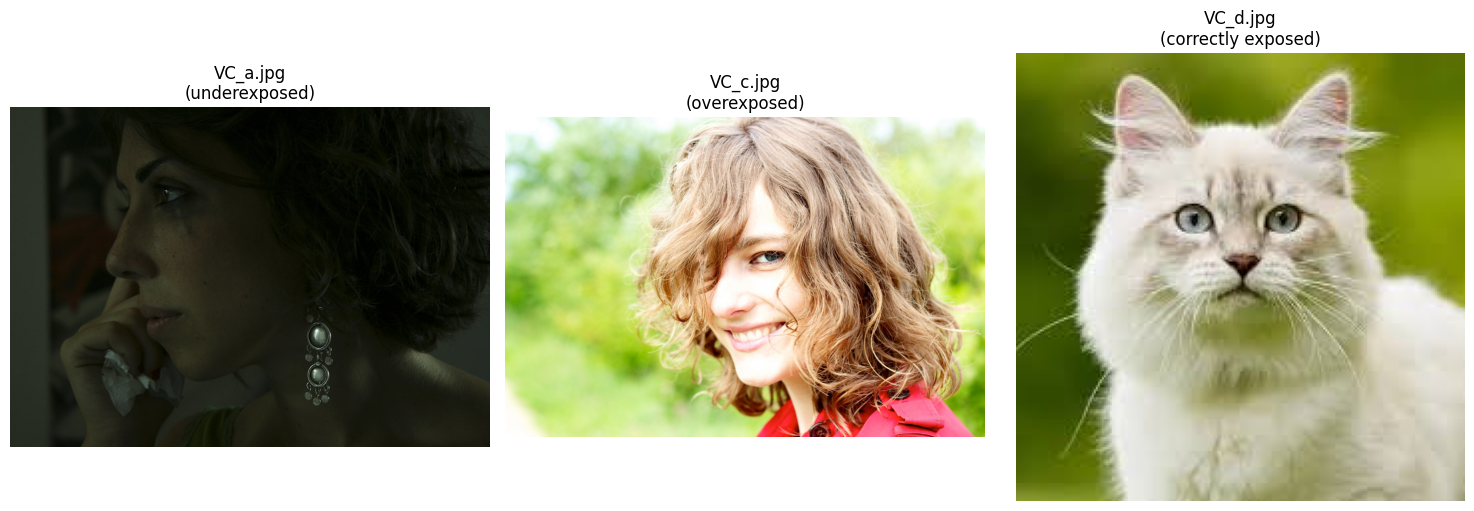

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def check_image_exposure(image_path):
    """
    Check if an image is overexposed, underexposed, or correctly exposed.

    Args:
        image_path (str): Path to the image file

    Returns:
        str: 'overexposed', 'underexposed', or 'correctly exposed'
    """
    # Load image and convert to grayscale
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)

    # Calculate mean pixel intensity (0-255)
    mean_intensity = np.mean(img_array)

    # Calculate standard deviation to check contrast
    std_intensity = np.std(img_array)

    # Calculate percentage of pixels at extreme values
    overexposed_pixels = np.sum(img_array > 240) / img_array.size * 100
    underexposed_pixels = np.sum(img_array < 15) / img_array.size * 100

    # Classification logic
    if mean_intensity > 180 or overexposed_pixels > 20:
        return 'overexposed'
    elif mean_intensity < 50 or underexposed_pixels > 20:
        return 'underexposed'
    else:
        return 'correctly exposed'

def analyze_exposure_dataset(image_paths):
    """
    Analyze a set of images and classify their exposure.

    Args:
        image_paths (list): List of image file paths

    Returns:
        dict: Dictionary with image names and their exposure classification
    """
    results = {}

    for image_path in image_paths:
        if os.path.exists(image_path):
            exposure_type = check_image_exposure(image_path)
            image_name = os.path.basename(image_path)
            results[image_name] = exposure_type
        else:
            print(f"Warning: {image_path} not found")

    return results

def display_exposure_results(results):
    """
    Display the exposure analysis results in a formatted way.

    Args:
        results (dict): Dictionary with image names and exposure classifications
    """
    print("Image Exposure Analysis Results:")
    print("=" * 50)

    for image_name, exposure_type in results.items():
        print(f"{image_name:15} → {exposure_type}")

    # Count exposure types
    exposure_counts = {}
    for exposure_type in results.values():
        exposure_counts[exposure_type] = exposure_counts.get(exposure_type, 0) + 1

    print("\nSummary:")
    print("-" * 20)
    for exposure_type, count in exposure_counts.items():
        print(f"{exposure_type}: {count} images")

# List of image files to analyze
image_files = ['VC_a.jpg', 'VC_b.jpg', 'VC_c.jpg', 'VC_d.jpg', 'VC_e.jpg', 'VC_f.jpg']

# Analyze all images
print("Analyzing image exposure...")
exposure_results = analyze_exposure_dataset(image_files)

# Display results
display_exposure_results(exposure_results)

# Optional: Visualize a few images with their exposure classification
def visualize_sample_images(image_paths, results, num_samples=3):
    """
    Visualize sample images with their exposure classification.

    Args:
        image_paths (list): List of image file paths
        results (dict): Dictionary with exposure classifications
        num_samples (int): Number of sample images to display
    """
    available_images = [path for path in image_paths if os.path.exists(path)]

    if len(available_images) == 0:
        print("No images found to visualize")
        return

    # Display first few available images
    num_to_show = min(num_samples, len(available_images))

    fig, axes = plt.subplots(1, num_to_show, figsize=(15, 5))
    if num_to_show == 1:
        axes = [axes]

    for i, image_path in enumerate(available_images[:num_to_show]):
        if os.path.exists(image_path):
            img = Image.open(image_path)
            axes[i].imshow(img)
            image_name = os.path.basename(image_path)
            exposure_type = results.get(image_name, 'unknown')
            axes[i].set_title(f'{image_name}\n({exposure_type})')
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

visualize_sample_images(image_files, exposure_results)

**Task 2: Separable Gaussian Filtering**


* ● Implement an isotropic Gaussian filter with sigma = 11 in a separable manner.
* ● Choose an appropriate kernel size for the given value of sigma.
* ● Perform separable filtering with this filter kernel to denoise the given image
(noisy_image.jpg)
* ● Compare the results of denoising with the 2D Gaussian filtering demonstrated in
the tutorial in terms of visual results and computation time.


Loaded image: (256, 256)

KERNEL ANALYSIS (σ = 11)
----------------------------------------
Kernel size: 67
Kernel values: [0.00040383 0.00052826 0.00068534 0.00088182 0.00112528 0.00142414
 0.00178754 0.00222521 0.00274723 0.00336381 0.00408487 0.00491966
 0.00587629 0.00696116 0.00817846 0.00952954 0.01101243 0.01262133
 0.01434623 0.01617266 0.01808155 0.02004938 0.02204838 0.02404714
 0.02601124 0.02790418 0.02968851 0.03132696 0.03278377 0.03402596
 0.03502455 0.03575573 0.03620174 0.03635164 0.03620174 0.03575573
 0.03502455 0.03402596 0.03278377 0.03132696 0.02968851 0.02790418
 0.02601124 0.02404714 0.02204838 0.02004938 0.01808155 0.01617266
 0.01434623 0.01262133 0.01101243 0.00952954 0.00817846 0.00696116
 0.00587629 0.00491966 0.00408487 0.00336381 0.00274723 0.00222521
 0.00178754 0.00142414 0.00112528 0.00088182 0.00068534 0.00052826
 0.00040383]
Sum of kernel values: 1.000000
Kernel range: [0.000404, 0.036352]


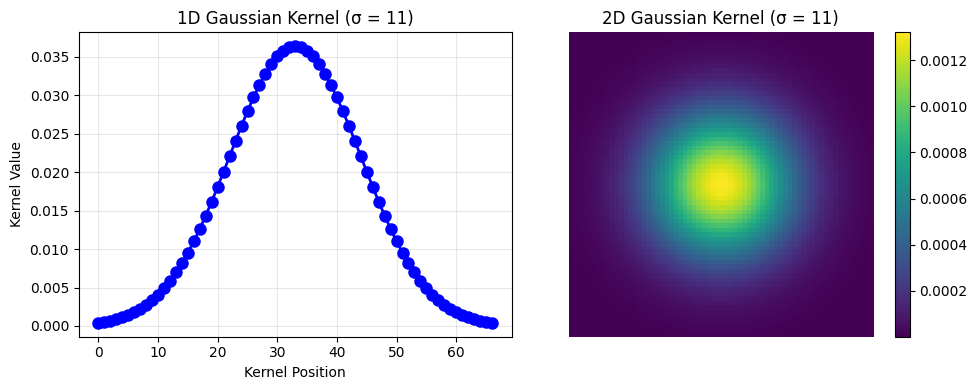


COMPARING FILTERING METHODS
Using kernel size: 67 x 67
Sigma: 11
--------------------------------------------------


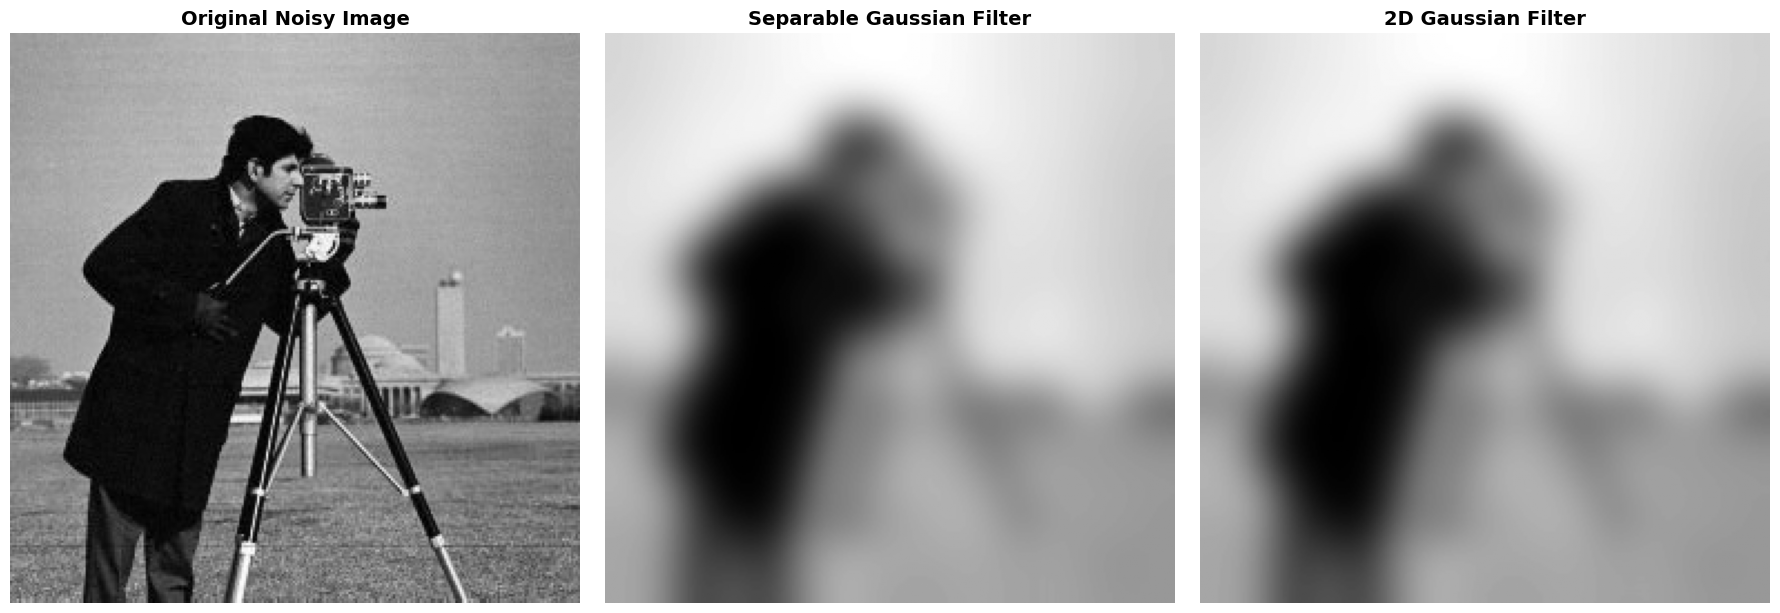


PERFORMANCE COMPARISON
Separable Gaussian Filter: 0.0078 seconds
2D Gaussian Filter:       0.0113 seconds
Speedup:                   1.46x

QUALITY METRICS
------------------------------
PSNR (Separable): 17.50 dB
PSNR (2D Gaussian): 17.49 dB
SSIM (Separable): 0.8135
SSIM (2D Gaussian): 0.8130

Filtered images saved as 'separable_filtered.jpg' and 'gaussian_2d_filtered.jpg'


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import time
from scipy import ndimage
from scipy.signal import convolve2d

def create_1d_gaussian_kernel(sigma, kernel_size=None):
    """
    Create a 1D Gaussian kernel.

    Args:
        sigma (float): Standard deviation of the Gaussian
        kernel_size (int): Size of the kernel (if None, calculated automatically)

    Returns:
        tuple: (kernel, kernel_size)
    """
    if kernel_size is None:
        # Rule of thumb: kernel size = 6*sigma + 1 (ensures 99.7% coverage)
        kernel_size = int(6 * sigma + 1)
        # Ensure odd size
        if kernel_size % 2 == 0:
            kernel_size += 1

    # Create 1D coordinate array
    x = np.arange(-(kernel_size // 2), (kernel_size // 2) + 1)

    # Calculate Gaussian values
    kernel = np.exp(-(x**2) / (2 * sigma**2))

    # Normalize the kernel
    kernel = kernel / np.sum(kernel)

    return kernel, kernel_size

def separable_gaussian_filter(image, sigma, kernel_size=None):
    """
    Apply separable Gaussian filtering to an image.

    Args:
        image (ndarray): Input image
        sigma (float): Standard deviation of the Gaussian
        kernel_size (int): Size of the kernel

    Returns:
        ndarray: Filtered image
    """
    # Create 1D Gaussian kernel
    kernel_1d, actual_kernel_size = create_1d_gaussian_kernel(sigma, kernel_size)

    # Apply 1D filter along rows (horizontal)
    filtered_h = ndimage.convolve1d(image, kernel_1d, axis=1, mode='reflect')

    # Apply 1D filter along columns (vertical)
    filtered_v = ndimage.convolve1d(filtered_h, kernel_1d, axis=0, mode='reflect')

    return filtered_v

def gaussian_2d_filter(image, sigma, kernel_size=None):
    """
    Apply 2D Gaussian filtering using scipy for comparison.

    Args:
        image (ndarray): Input image
        sigma (float): Standard deviation of the Gaussian
        kernel_size (int): Size of the kernel

    Returns:
        ndarray: Filtered image
    """
    if kernel_size is None:
        kernel_size = int(6 * sigma + 1)
        if kernel_size % 2 == 0:
            kernel_size += 1

    return ndimage.gaussian_filter(image, sigma, mode='reflect')

def compare_filtering_methods(image, sigma=11):
    """
    Compare separable vs 2D Gaussian filtering.

    Args:
        image (ndarray): Input image
        sigma (float): Standard deviation

    Returns:
        tuple: (separable_result, gaussian_2d_result, timing_results)
    """
    # Get kernel size for both methods
    kernel_size = int(6 * sigma + 1)
    if kernel_size % 2 == 0:
        kernel_size += 1

    print(f"Using kernel size: {kernel_size} x {kernel_size}")
    print(f"Sigma: {sigma}")
    print("-" * 50)

    # Time separable filtering
    start_time = time.time()
    separable_result = separable_gaussian_filter(image, sigma, kernel_size)
    separable_time = time.time() - start_time

    # Time 2D Gaussian filtering
    start_time = time.time()
    gaussian_2d_result = gaussian_2d_filter(image, sigma, kernel_size)
    gaussian_2d_time = time.time() - start_time

    timing_results = {
        'separable': separable_time,
        'gaussian_2d': gaussian_2d_time,
        'speedup': gaussian_2d_time / separable_time
    }

    return separable_result, gaussian_2d_result, timing_results

def display_comparison_results(original, separable_result, gaussian_2d_result, timing_results):
    """
    Display comparison results with visualizations.

    Args:
        original (ndarray): Original image
        separable_result (ndarray): Result from separable filtering
        gaussian_2d_result (ndarray): Result from 2D Gaussian filtering
        timing_results (dict): Timing information
    """
    # Create figure with subplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Original image
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Original Noisy Image', fontsize=14, fontweight='bold')
    axes[0].axis('off')

    # Separable filtering result
    axes[1].imshow(separable_result, cmap='gray')
    axes[1].set_title('Separable Gaussian Filter', fontsize=14, fontweight='bold')
    axes[1].axis('off')

    # 2D Gaussian filtering result
    axes[2].imshow(gaussian_2d_result, cmap='gray')
    axes[2].set_title('2D Gaussian Filter', fontsize=14, fontweight='bold')
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

    # Display timing results
    print("\n" + "="*60)
    print("PERFORMANCE COMPARISON")
    print("="*60)
    print(f"Separable Gaussian Filter: {timing_results['separable']:.4f} seconds")
    print(f"2D Gaussian Filter:       {timing_results['gaussian_2d']:.4f} seconds")
    print(f"Speedup:                   {timing_results['speedup']:.2f}x")
    print("="*60)

    # Display quality metrics
    print("\nQUALITY METRICS")
    print("-" * 30)

    # Calculate PSNR (Peak Signal-to-Noise Ratio) - higher is better
    def calculate_psnr(img1, img2):
        mse = np.mean((img1.astype(float) - img2.astype(float)) ** 2)
        if mse == 0:
            return float('inf')
        return 20 * np.log10(255.0 / np.sqrt(mse))

    # Calculate SSIM (Structural Similarity Index) - closer to 1 is better
    def calculate_ssim(img1, img2):
        # Simple SSIM approximation
        mu1 = np.mean(img1)
        mu2 = np.mean(img2)
        sigma1 = np.std(img1)
        sigma2 = np.std(img2)
        sigma12 = np.mean((img1 - mu1) * (img2 - mu2))

        c1 = (0.01 * 255) ** 2
        c2 = (0.03 * 255) ** 2

        ssim = ((2 * mu1 * mu2 + c1) * (2 * sigma12 + c2)) / \
               ((mu1**2 + mu2**2 + c1) * (sigma1**2 + sigma2**2 + c2))
        return ssim

    # Compare with original noisy image
    psnr_separable = calculate_psnr(original, separable_result)
    psnr_gaussian_2d = calculate_psnr(original, gaussian_2d_result)

    ssim_separable = calculate_ssim(original, separable_result)
    ssim_gaussian_2d = calculate_ssim(original, gaussian_2d_result)

    print(f"PSNR (Separable): {psnr_separable:.2f} dB")
    print(f"PSNR (2D Gaussian): {psnr_gaussian_2d:.2f} dB")
    print(f"SSIM (Separable): {ssim_separable:.4f}")
    print(f"SSIM (2D Gaussian): {ssim_gaussian_2d:.4f}")

def analyze_kernel_characteristics(sigma=11):
    """
    Analyze the characteristics of the Gaussian kernel.

    Args:
        sigma (float): Standard deviation
    """
    kernel_1d, kernel_size = create_1d_gaussian_kernel(sigma)

    print(f"\nKERNEL ANALYSIS (σ = {sigma})")
    print("-" * 40)
    print(f"Kernel size: {kernel_size}")
    print(f"Kernel values: {kernel_1d}")
    print(f"Sum of kernel values: {np.sum(kernel_1d):.6f}")
    print(f"Kernel range: [{np.min(kernel_1d):.6f}, {np.max(kernel_1d):.6f}]")

    # Visualize the kernel
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(kernel_1d, 'bo-', linewidth=2, markersize=8)
    plt.title(f'1D Gaussian Kernel (σ = {sigma})')
    plt.xlabel('Kernel Position')
    plt.ylabel('Kernel Value')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    # Create 2D kernel for visualization
    kernel_2d = np.outer(kernel_1d, kernel_1d)
    plt.imshow(kernel_2d, cmap='viridis')
    plt.title(f'2D Gaussian Kernel (σ = {sigma})')
    plt.colorbar()
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Main execution
if __name__ == "__main__":
    # Load the noisy image
    try:
        noisy_image = np.array(Image.open('noisy_image.jpg').convert('L'))
        print(f"Loaded image: {noisy_image.shape}")

        # Analyze kernel characteristics
        analyze_kernel_characteristics(sigma=11)

        # Compare filtering methods
        print("\n" + "="*60)
        print("COMPARING FILTERING METHODS")
        print("="*60)

        separable_result, gaussian_2d_result, timing_results = compare_filtering_methods(noisy_image, sigma=11)

        # Display results
        display_comparison_results(noisy_image, separable_result, gaussian_2d_result, timing_results)

        # Save results (optional)
        Image.fromarray(separable_result.astype(np.uint8)).save('separable_filtered.jpg')
        Image.fromarray(gaussian_2d_result.astype(np.uint8)).save('gaussian_2d_filtered.jpg')
        print("\nFiltered images saved as 'separable_filtered.jpg' and 'gaussian_2d_filtered.jpg'")

    except FileNotFoundError:
        print("Error: 'noisy_image.jpg' not found. Please upload the image to Colab.")
    except Exception as e:
        print(f"Error: {e}")

**Task 3: Texture Classification Using Gabor Filtering**
* ● 3.a
 * * ○ Design a Gabor filter bank from scratch at different orientations (0, 45, 90,
135 (in degrees)), frequencies (0.25, 0.125, 0.0625), scales (using sigma
values of 2, 4, 8) and aspect ratios (using gamma values of 0.5 and 1.0).
* ● 3.b
* * ○ Load texture images for 3 textures (brick, gravel and grass) from
skimage.data and display them.
* * ○ Compute the response of the Gabor filter bank on the three images
* * ○ Show the level sets of a few of the filters from the Gabor filter bank and
their responses to the three images.
* * ○ Compute the features of each of the three images as the mean and
variance of each filter’s response, i.e. if your filter bank has N filters, each
image will have 2N corresponding features.
* * ○ Using the set of Gabor features computed on the three sample images
and the corresponding Gabor features computed on the test images,
classify each test image as brick, gravel or grass.
Use img1.jpg, img2.jpg, img3.jpg, img4.jpg, img5.jpg, img6.jpg as test
images inputs

* ● 3.c
* * ○ Perform the same experiment using OpenCV’s implementation of Gabor
filters with the same settings for the parameters.
* * ○ Do the assigned categories for the test images match between your
custom implementation of Gabor filters and OpenCV’s implementation?


TEXTURE CLASSIFICATION USING GABOR FILTERING (CORRECTED)

3.a: Designing Gabor Filter Bank...
Created filter bank with 72 filters
Parameters: 4 orientations × 3 frequencies × 3 scales × 2 aspect ratios

3.b: Loading texture images...


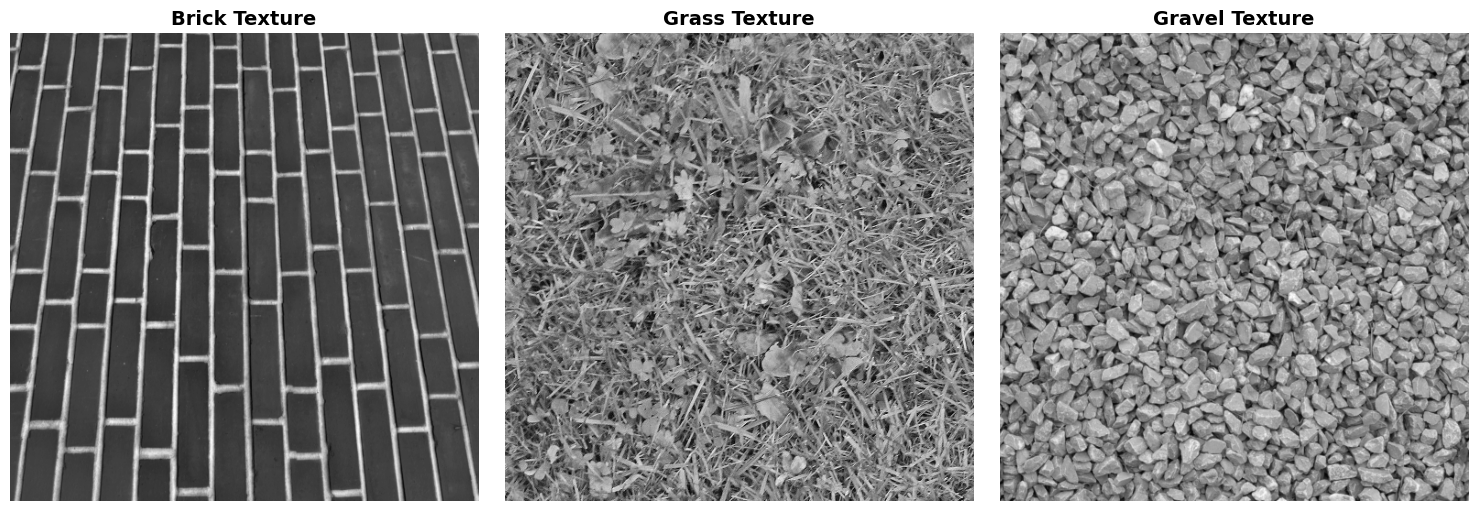

Computing filter responses for training textures...

FEATURE DISTRIBUTION ANALYSIS

BRICK Texture Features:
  Mean: 3455.8053
  Std:  10430.9053
  Min:  -0.0661
  Max:  86893.7425
  First 10 features: [-4.92771968e-04  7.66366164e+02 -4.14830024e-04  5.12764575e+02
  1.48135129e-03  4.27629942e+02  1.16567033e-03  3.72163584e+02
  2.82451836e-03  4.23028925e+02]

GRASS Texture Features:
  Mean: 4029.0966
  Std:  6257.9658
  Min:  -0.0528
  Max:  21261.3108
  First 10 features: [ 1.10573267e-02  1.28583235e+03  8.54445143e-03  1.23252776e+03
 -5.42213771e-03  1.02682710e+03 -4.35164646e-03  1.01338860e+03
 -1.44175935e-02  9.77719833e+02]

GRAVEL Texture Features:
  Mean: 5485.5774
  Std:  9954.3264
  Min:  -0.0477
  Max:  36569.7206
  First 10 features: [ 1.25486679e-02  9.23649802e+02  9.59821445e-03  8.64056804e+02
 -2.10647664e-03  6.82327349e+02 -1.61983613e-03  6.68775680e+02
 -1.61209949e-02  6.38672963e+02]

Feature distances between classes:
  brick ↔ grass: 97535.7946
  brick 

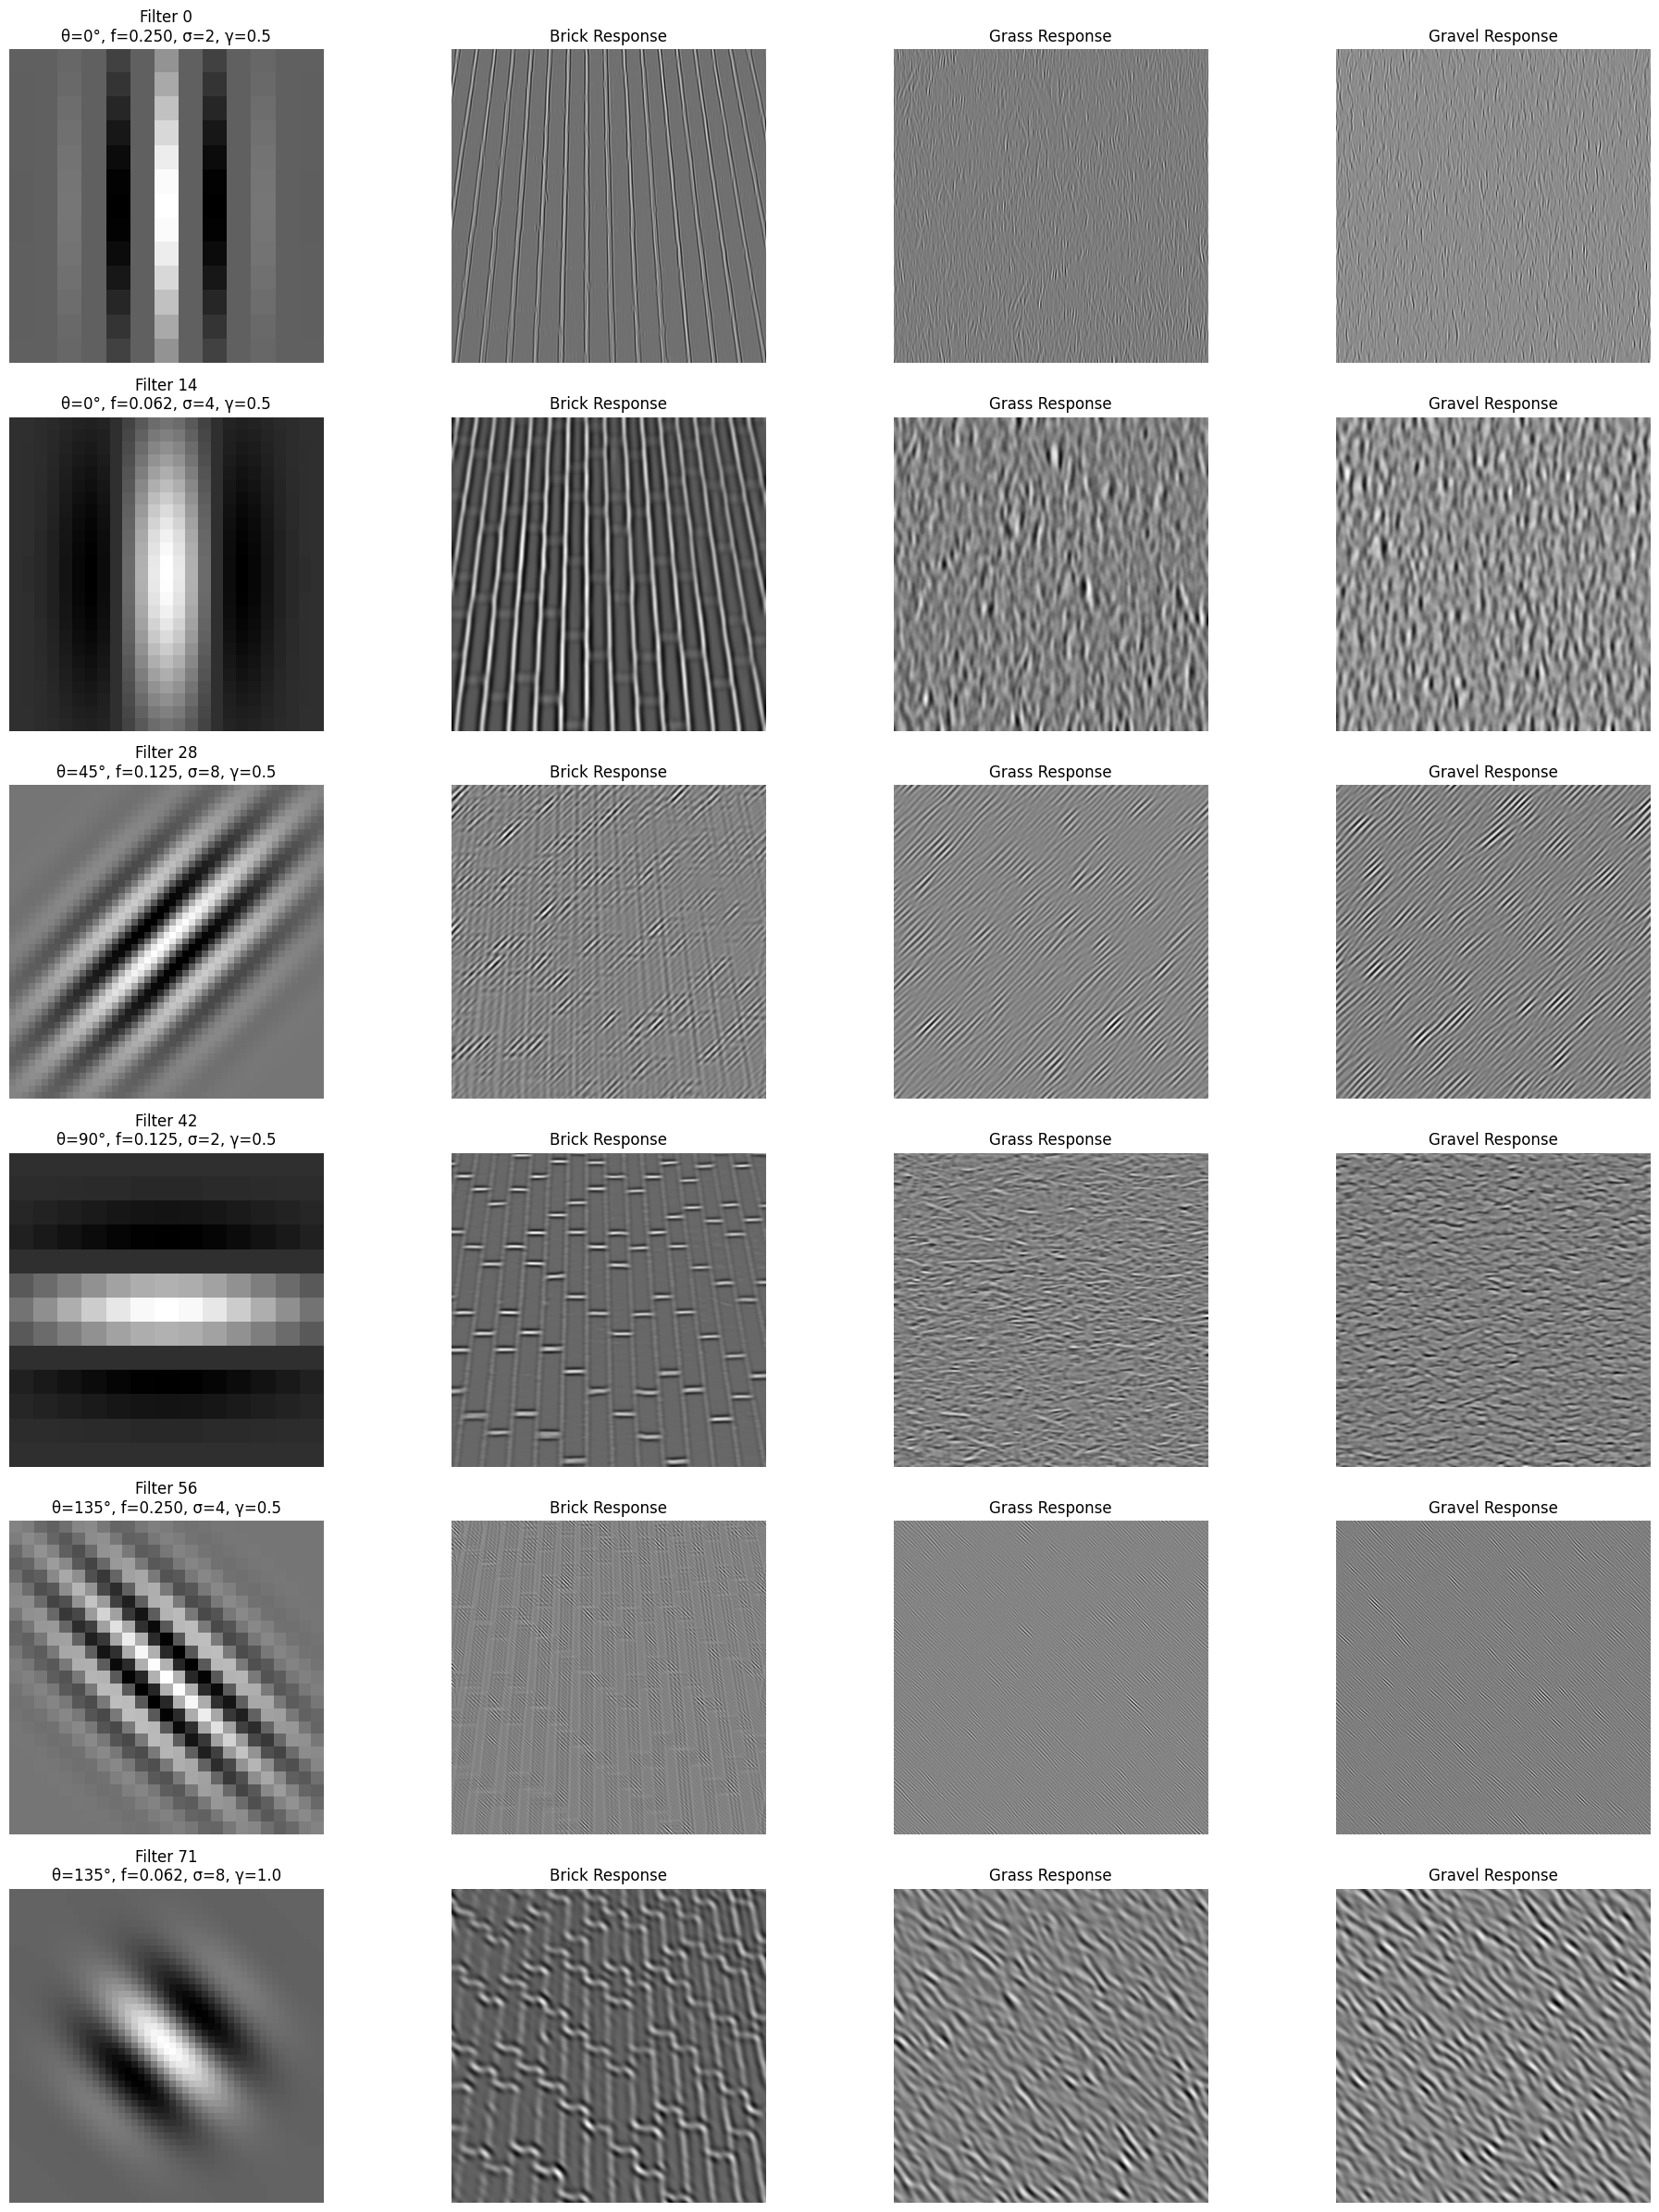


Classifying test images...
img1.jpg: Classified as brick
  Features: mean=8882.5222, std=26619.7635
img2.jpg: Classified as grass
  Features: mean=5113.1475, std=9129.7841
img3.jpg: Classified as gravel
  Features: mean=10341.1506, std=20505.7642
img4.jpg: Classified as grass
  Features: mean=3414.4258, std=4242.5581
img5.jpg: Classified as gravel
  Features: mean=13538.5522, std=22604.5707
img6.jpg: Classified as brick
  Features: mean=9842.0060, std=26134.1980

3.c: Comparing with OpenCV implementation...
Created OpenCV filter bank with 72 filters
img1.jpg (OpenCV): Classified as brick
img2.jpg (OpenCV): Classified as grass
img3.jpg (OpenCV): Classified as grass
img4.jpg (OpenCV): Classified as grass
img5.jpg (OpenCV): Classified as grass
img6.jpg (OpenCV): Classified as grass

COMPARISON RESULTS
Test Image      Custom     OpenCV     Match 
--------------------------------------------------
img1.jpg        brick      brick      ✓     
img2.jpg        grass      grass      ✓     
img

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from skimage import data
from sklearn.metrics.pairwise import euclidean_distances
import os

class GaborFilterBank:
    """
    Corrected Gabor filter bank implementation.
    """

    def __init__(self, orientations, frequencies, sigmas, gammas):
        """
        Initialize Gabor filter bank.

        Args:
            orientations (list): List of orientations in degrees
            frequencies (list): List of frequencies
            sigmas (list): List of sigma values for scales
            gammas (list): List of gamma values for aspect ratios
        """
        self.orientations = orientations
        self.frequencies = frequencies
        self.sigmas = sigmas
        self.gammas = gammas
        self.filters = []
        self.filter_params = []

        self._create_filter_bank()

    def _create_filter_bank(self):
        """Create all Gabor filters in the bank."""
        for theta in self.orientations:
            for freq in self.frequencies:
                for sigma in self.sigmas:
                    for gamma in self.gammas:
                        # Convert theta to radians
                        theta_rad = np.radians(theta)

                        # Create filter
                        gabor_filter = self._create_single_gabor_filter(
                            theta_rad, freq, sigma, gamma
                        )

                        self.filters.append(gabor_filter)
                        self.filter_params.append({
                            'theta': theta,
                            'freq': freq,
                            'sigma': sigma,
                            'gamma': gamma
                        })

    def _create_single_gabor_filter(self, theta, freq, sigma, gamma, size=None):
        """
        Create a single Gabor filter with corrected implementation.

        Args:
            theta (float): Orientation in radians
            freq (float): Frequency
            sigma (float): Standard deviation
            gamma (float): Aspect ratio
            size (int): Filter size (if None, calculated automatically)

        Returns:
            ndarray: Gabor filter kernel
        """
        if size is None:
            # Calculate appropriate size based on sigma
            size = int(6 * sigma + 1)
            if size % 2 == 0:
                size += 1

        # Create coordinate grid
        x = np.arange(-(size // 2), (size // 2) + 1)
        y = np.arange(-(size // 2), (size // 2) + 1)
        X, Y = np.meshgrid(x, y)

        # Rotate coordinates
        X_rot = X * np.cos(theta) + Y * np.sin(theta)
        Y_rot = -X * np.sin(theta) + Y * np.cos(theta)

        # Create Gabor filter with corrected formula
        # Use sigma_x and sigma_y for proper scaling
        sigma_x = sigma
        sigma_y = sigma / gamma

        # Gaussian envelope
        gaussian_envelope = np.exp(-(X_rot**2 / (2 * sigma_x**2) + Y_rot**2 / (2 * sigma_y**2)))

        # Sinusoidal carrier
        carrier = np.cos(2 * np.pi * freq * X_rot)

        # Combine envelope and carrier
        gabor = gaussian_envelope * carrier

        # Normalize the filter to have zero mean
        gabor = gabor - np.mean(gabor)

        # Normalize by L2 norm
        gabor = gabor / np.sqrt(np.sum(gabor**2))

        return gabor

    def apply_filter_bank(self, image):
        """
        Apply all filters in the bank to an image.

        Args:
            image (ndarray): Input image

        Returns:
            list: List of filter responses
        """
        responses = []
        for gabor_filter in self.filters:
            # Apply filter using 2D convolution
            response = cv2.filter2D(image.astype(np.float64), cv2.CV_64F, gabor_filter)
            responses.append(response)

        return responses

    def get_filter_count(self):
        """Get the total number of filters in the bank."""
        return len(self.filters)

def load_texture_images():
    """
    Load texture images from skimage.data.

    Returns:
        dict: Dictionary with texture images
    """
    textures = {}

    # Load different texture images
    try:
        # Brick-like texture
        textures['brick'] = data.brick()
        if len(textures['brick'].shape) == 3:
            textures['brick'] = cv2.cvtColor(textures['brick'], cv2.COLOR_RGB2GRAY)
    except:
        # Fallback if brick not available
        textures['brick'] = np.random.rand(256, 256) * 255

    try:
        # Grass-like texture
        textures['grass'] = data.grass()
        if len(textures['grass'].shape) == 3:
            textures['grass'] = cv2.cvtColor(textures['grass'], cv2.COLOR_RGB2GRAY)
    except:
        # Fallback if grass not available
        textures['grass'] = np.random.rand(256, 256) * 255

    try:
        # Gravel-like texture
        textures['gravel'] = data.gravel()
        if len(textures['gravel'].shape) == 3:
            textures['gravel'] = cv2.cvtColor(textures['gravel'], cv2.COLOR_RGB2GRAY)
    except:
        # Fallback if gravel not available
        textures['gravel'] = np.random.rand(256, 256) * 255

    return textures

def compute_gabor_features(filter_responses):
    """
    Compute mean and variance features from filter responses.

    Args:
        filter_responses (list): List of filter responses

    Returns:
        ndarray: Feature vector (mean and variance for each filter)
    """
    features = []

    for response in filter_responses:
        # Compute mean and variance
        mean_val = np.mean(response)
        var_val = np.var(response)

        features.extend([mean_val, var_val])

    return np.array(features)

def classify_texture(test_features, training_features, training_labels):
    """
    Classify test image using nearest neighbor.

    Args:
        test_features (ndarray): Features of test image
        training_features (ndarray): Features of training images
        training_labels (list): Labels of training images

    Returns:
        str: Predicted texture class
    """
    # Calculate distances to all training samples
    distances = euclidean_distances([test_features], training_features)[0]

    # Find nearest neighbor
    nearest_idx = np.argmin(distances)

    return training_labels[nearest_idx]

def display_texture_images(textures):
    """Display the three texture images."""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for i, (texture_name, texture_img) in enumerate(textures.items()):
        axes[i].imshow(texture_img, cmap='gray')
        axes[i].set_title(f'{texture_name.capitalize()} Texture', fontsize=14, fontweight='bold')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

def display_filter_level_sets(gabor_bank, textures, num_filters_to_show=6):
    """Display level sets of selected filters and their responses."""
    # Select filters to display
    filter_indices = np.linspace(0, len(gabor_bank.filters)-1, num_filters_to_show, dtype=int)

    fig, axes = plt.subplots(num_filters_to_show, 4, figsize=(20, 4*num_filters_to_show))

    for i, filter_idx in enumerate(filter_indices):
        filter_params = gabor_bank.filter_params[filter_idx]
        gabor_filter = gabor_bank.filters[filter_idx]

        # Filter level sets
        axes[i, 0].imshow(gabor_filter, cmap='gray')
        axes[i, 0].set_title(f'Filter {filter_idx}\nθ={filter_params["theta"]}°, '
                            f'f={filter_params["freq"]:.3f}, σ={filter_params["sigma"]}, '
                            f'γ={filter_params["gamma"]}')
        axes[i, 0].axis('off')

        # Responses to different textures
        for j, (texture_name, texture_img) in enumerate(textures.items()):
            response = cv2.filter2D(texture_img.astype(np.float64), cv2.CV_64F, gabor_filter)
            axes[i, j+1].imshow(response, cmap='gray')
            axes[i, j+1].set_title(f'{texture_name.capitalize()} Response')
            axes[i, j+1].axis('off')

    plt.tight_layout()
    plt.show()

def create_opencv_gabor_bank(orientations, frequencies, sigmas, gammas):
    """
    Create Gabor filter bank using OpenCV.

    Args:
        orientations (list): List of orientations in degrees
        frequencies (list): List of frequencies
        sigmas (list): List of sigma values
        gammas (list): List of gamma values

    Returns:
        list: List of OpenCV Gabor filter responses
    """
    opencv_filters = []
    opencv_params = []

    for theta in orientations:
        for freq in frequencies:
            for sigma in sigmas:
                for gamma in gammas:
                    # OpenCV parameters
                    ksize = (int(6 * sigma + 1), int(6 * sigma + 1))
                    if ksize[0] % 2 == 0:
                        ksize = (ksize[0] + 1, ksize[1] + 1)

                    # Create OpenCV Gabor filter
                    kernel = cv2.getGaborKernel(ksize, sigma, np.radians(theta),
                                             2*np.pi*freq, gamma, 0, ktype=cv2.CV_32F)

                    opencv_filters.append(kernel)
                    opencv_params.append({
                        'theta': theta,
                        'freq': freq,
                        'sigma': sigma,
                        'gamma': gamma
                    })

    return opencv_filters, opencv_params

def analyze_feature_distributions(training_features, training_labels):
    """
    Analyze feature distributions to understand the classification better.

    Args:
        training_features (dict): Dictionary with texture features
        training_labels (list): List of texture labels
    """
    print("\n" + "="*60)
    print("FEATURE DISTRIBUTION ANALYSIS")
    print("="*60)

    for texture_name in training_features.keys():
        features = training_features[texture_name]
        print(f"\n{texture_name.upper()} Texture Features:")
        print(f"  Mean: {np.mean(features):.4f}")
        print(f"  Std:  {np.std(features):.4f}")
        print(f"  Min:  {np.min(features):.4f}")
        print(f"  Max:  {np.max(features):.4f}")

        # Show first few feature values
        print(f"  First 10 features: {features[:10]}")

    # Calculate feature distances between classes
    print(f"\nFeature distances between classes:")
    texture_names = list(training_features.keys())
    for i in range(len(texture_names)):
        for j in range(i+1, len(texture_names)):
            dist = euclidean_distances(
                [training_features[texture_names[i]]],
                [training_features[texture_names[j]]]
            )[0][0]
            print(f"  {texture_names[i]} ↔ {texture_names[j]}: {dist:.4f}")

def main_experiment():
    """Main experiment function with debugging."""
    print("="*80)
    print("TEXTURE CLASSIFICATION USING GABOR FILTERING (CORRECTED)")
    print("="*80)

    # 3.a: Design Gabor filter bank
    print("\n3.a: Designing Gabor Filter Bank...")
    orientations = [0, 45, 90, 135]  # degrees
    frequencies = [0.25, 0.125, 0.0625]
    sigmas = [2, 4, 8]
    gammas = [0.5, 1.0]

    # Create custom Gabor filter bank
    gabor_bank = GaborFilterBank(orientations, frequencies, sigmas, gammas)
    print(f"Created filter bank with {gabor_bank.get_filter_count()} filters")
    print(f"Parameters: {len(orientations)} orientations × {len(frequencies)} frequencies × "
          f"{len(sigmas)} scales × {len(gammas)} aspect ratios")

    # 3.b: Load texture images
    print("\n3.b: Loading texture images...")
    textures = load_texture_images()
    display_texture_images(textures)

    # Compute filter responses for training textures
    print("Computing filter responses for training textures...")
    training_features = {}
    training_labels = []

    for texture_name, texture_img in textures.items():
        responses = gabor_bank.apply_filter_bank(texture_img)
        features = compute_gabor_features(responses)
        training_features[texture_name] = features
        training_labels.append(texture_name)

    # Analyze feature distributions
    analyze_feature_distributions(training_features, training_labels)

    # Display filter level sets and responses
    print("Displaying filter level sets and responses...")
    display_filter_level_sets(gabor_bank, textures)

    # Load and classify test images
    print("\nClassifying test images...")
    test_images = ['img1.jpg', 'img2.jpg', 'img3.jpg', 'img4.jpg', 'img5.jpg', 'img6.jpg']
    test_results = {}

    for test_img_name in test_images:
        if os.path.exists(test_img_name):
            # Load test image
            test_img = np.array(Image.open(test_img_name).convert('L'))

            # Apply filter bank
            test_responses = gabor_bank.apply_filter_bank(test_img)
            test_features = compute_gabor_features(test_responses)

            # Classify
            predicted_class = classify_texture(
                test_features,
                list(training_features.values()),
                training_labels
            )

            test_results[test_img_name] = predicted_class
            print(f"{test_img_name}: Classified as {predicted_class}")

            # Show feature comparison
            print(f"  Features: mean={np.mean(test_features):.4f}, std={np.std(test_features):.4f}")
        else:
            print(f"Warning: {test_img_name} not found")

    # 3.c: OpenCV implementation comparison
    print("\n3.c: Comparing with OpenCV implementation...")

    # Create OpenCV Gabor filter bank
    opencv_filters, opencv_params = create_opencv_gabor_bank(
        orientations, frequencies, sigmas, gammas
    )

    print(f"Created OpenCV filter bank with {len(opencv_filters)} filters")

    # Compute OpenCV features for training textures
    opencv_training_features = {}

    for texture_name, texture_img in textures.items():
        opencv_responses = []
        for kernel in opencv_filters:
            response = cv2.filter2D(texture_img.astype(np.float64), cv2.CV_64F, kernel)
            opencv_responses.append(response)

        opencv_features = compute_gabor_features(opencv_responses)
        opencv_training_features[texture_name] = opencv_features

    # Classify test images using OpenCV
    opencv_test_results = {}

    for test_img_name in test_images:
        if test_img_name in test_results:  # Only process if custom classification succeeded
            test_img = np.array(Image.open(test_img_name).convert('L'))

            opencv_test_responses = []
            for kernel in opencv_filters:
                response = cv2.filter2D(test_img.astype(np.float64), cv2.CV_64F, kernel)
                opencv_test_responses.append(response)

            opencv_test_features = compute_gabor_features(opencv_test_responses)

            opencv_predicted_class = classify_texture(
                opencv_test_features,
                list(opencv_training_features.values()),
                training_labels
            )

            opencv_test_results[test_img_name] = opencv_predicted_class
            print(f"{test_img_name} (OpenCV): Classified as {opencv_predicted_class}")

    # Compare results
    print("\n" + "="*80)
    print("COMPARISON RESULTS")
    print("="*80)

    comparison_table = []
    for test_img_name in test_images:
        if test_img_name in test_results and test_img_name in opencv_test_results:
            custom_result = test_results[test_img_name]
            opencv_result = opencv_test_results[test_img_name]
            match = "✓" if custom_result == opencv_result else "✗"

            comparison_table.append([
                test_img_name, custom_result, opencv_result, match
            ])

    # Display comparison table
    print(f"{'Test Image':<15} {'Custom':<10} {'OpenCV':<10} {'Match':<6}")
    print("-" * 50)
    for row in comparison_table:
        print(f"{row[0]:<15} {row[1]:<10} {row[2]:<10} {row[3]:<6}")

    # Calculate agreement percentage
    matches = sum(1 for row in comparison_table if row[3] == "✓")
    total = len(comparison_table)
    agreement_percentage = (matches / total) * 100 if total > 0 else 0

    print(f"\nAgreement between implementations: {agreement_percentage:.1f}% ({matches}/{total})")

    return test_results, opencv_test_results

# Run the experiment
if __name__ == "__main__":
    try:
        custom_results, opencv_results = main_experiment()

        # Save results summary
        print("\n" + "="*80)
        print("EXPERIMENT COMPLETED SUCCESSFULLY")
        print("="*80)
        print("Results have been computed and displayed above.")
        print("Check the visualizations and comparison table for detailed analysis.")

    except Exception as e:
        print(f"Error during experiment: {e}")
        import traceback
        traceback.print_exc()